In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import special as sp
from scipy import constants as const

In [2]:
f = 2.8 * 1e9
er_real = 63
er_im = 20

def calc_da(er_real, er_im, f):
    k = 2 * np.pi * f / 3e8
    d_a = 1/(k * np.sqrt(0.5 * (np.sqrt(er_real**2 + er_im**2) - er_real)))
    return d_a

def gauss_function(x, a, x0, sigma):
  r"""
    Generate a narrow top hat to approximate a delta
    """
  return a / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x-x0)**2/(2*sigma**2))


#d_a = 1/(k * np.sqrt(0.5 * (np.sqrt(er_real**2 + er_im**2) - er_real)))

## Estimating the imaginary part

In [3]:
FWHM = np.log10(30) - np.log10(3)
print('By inspection the half maximum appears to be at 4 and 30 GHz. Corresponding to a FWHM of {}'.format(FWHM))

By inspection the half maximum appears to be at 4 and 30 GHz. Corresponding to a FWHM of 1.0


By definition 
$\sigma = \frac{FWHM}{2\sqrt{2ln2}}$

In [4]:
sigma = FWHM/(2*np.sqrt(2*np.log(2)))
print('Sigma is {}'.format(sigma))

Sigma is 0.42466090014400953


The maximum occurs at frequency 20 GHz

In [5]:
x0 = np.log10(20)
print('x0 is {}'.format(x0))

x0 is 1.3010299956639813


Amplitude is 40

In [6]:
A = 40
x = np.linspace(np.log10(1), np.log10(50))

In [7]:
er_im = gauss_function(x, A, x0, sigma)

## Estimating the real part

In [8]:
er_real = 60 / 2  * (1 + sp.erf((x0-x)/(np.sqrt(2) * sigma)))

Text(0, 0.5, 'Relative permittivity')

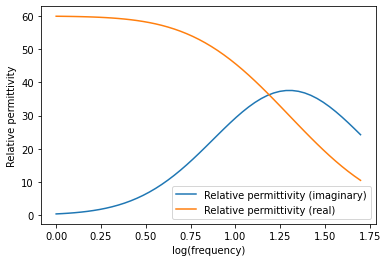

In [9]:
pyplot.plot(x,er_im)
pyplot.plot(x,er_real)
pyplot.legend(['Relative permittivity (imaginary)', 'Relative permittivity (real)'])
pyplot.xlabel('log(frequency)')
pyplot.ylabel('Relative permittivity')

This looks reasonably like the plot in the figure

In [10]:
d_a = calc_da(er_real, er_im, 10**x * 1e9)

Text(0, 0.5, 'Attenuation distance/m')

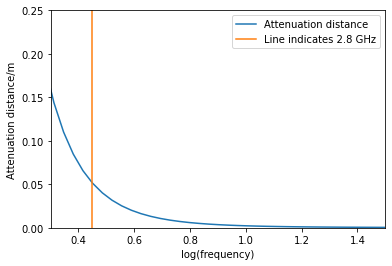

In [11]:
pyplot.plot(x,d_a)
pyplot.plot((np.log10(2.8), np.log10(2.8)),(0,8))
pyplot.xlim((0.3, 1.5))
pyplot.ylim((0, 0.25))
pyplot.legend(['Attenuation distance', 'Line indicates 2.8 GHz'])
pyplot.xlabel('log(frequency)')
pyplot.ylabel('Attenuation distance/m')

Text(0.5, 0, 'log(frequency)')

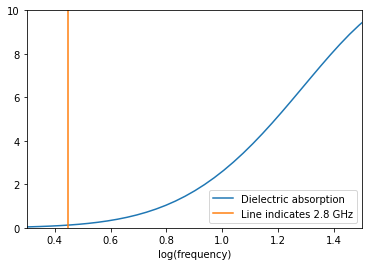

In [12]:
pyplot.plot(x,const.epsilon_0 * er_im * 10**x * 1e9)
pyplot.xlim((0.3, 1.5))
pyplot.plot((np.log10(2.8), np.log10(2.8)),(0,10))
pyplot.xlim((0.3, 1.5))
pyplot.ylim((0, 10))
pyplot.legend(['Dielectric absorption', 'Line indicates 2.8 GHz'])
pyplot.xlabel('log(frequency)')
#pyplot.ylabel('Attenuation distance/m')